In [13]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [14]:
CURRENT_DIR = os.getcwd()
PROJECT_DIR = os.path.dirname(CURRENT_DIR)
MODELS_PATH = os.path.join(PROJECT_DIR, 'models')
ENCODER_PATH = os.path.join(MODELS_PATH, 'encoders')
TEST_DATA_PATH = os.path.join(PROJECT_DIR, 
                              'data', 'raw', 'carInsurance_train.csv')

CATEG_PATH = os.path.join(PROJECT_DIR, 'references', 'categorical_columns.txt')
CONTI_PATH = os.path.join(PROJECT_DIR, 'references', 'continous_columns.txt')

PROJECT_NAME = '2.1-ie-base-model'

In [15]:
# adding system path
sys.path.insert(0, PROJECT_DIR)

In [16]:
# import internal function
from src.data import process_pipeline, encoder_pipeline, feature_selection_pipeline

In [17]:
# %% Helper Function
def get_content(txt_file):
    contents = []
    with open(txt_file) as file:
        for line in file:
            contents.append(line.strip())
            
    return contents

def plot_confusion_matrix_custom(model, X_test, y_test, classes):
    # Predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def evaluate_model_with_graph(model, X_test, y_test, classes):
    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy, Precision, Recall, F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    plot_confusion_matrix_custom(model, X_test, y_test, classes)

In [18]:
df = pd.read_csv(TEST_DATA_PATH)
df = process_pipeline.process_data(df)
df

c:\Users\isaac\anaconda3\envs\ds_project\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\isaac\anaconda3\envs\ds_project\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\isaac\anaconda3\envs\ds_project\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,cbrtBalance,negativeBalance,HasCommuncation,SinLastContactMonth,CosLastContactMonth,CallDuration,CallCategory,DaysPassed_Simplify,PrevAttemp_Simplify,Outcome_Simplify
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,10.679455,0,1,5.000000e-01,0.866025,70.0,Afternoon,0,0,0
1,2,32,blue-collar,married,primary,0,1156,1,0,No Communication,...,10.495085,0,0,5.000000e-01,-0.866025,185.0,Afternoon,0,0,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,8.604252,0,1,1.224647e-16,-1.000000,340.0,Afternoon,0,1,0
3,4,25,student,single,primary,0,373,1,0,cellular,...,7.198405,0,1,5.000000e-01,-0.866025,819.0,Afternoon,0,0,0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,13.914444,0,1,1.224647e-16,-1.000000,192.0,Afternoon,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,...,0.000000,0,1,5.000000e-01,-0.866025,269.0,Afternoon,0,1,0
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,...,4.986631,0,1,-5.000000e-01,-0.866025,125.0,Afternoon,0,0,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,...,-7.368063,1,1,-5.000000e-01,-0.866025,290.0,Afternoon,0,0,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,...,8.697784,0,1,5.000000e-01,0.866025,99.0,Morning,0,1,0


In [19]:
# Encoding
le = encoder_pipeline.getEncoder(ENCODER_PATH, df, PROJECT_NAME)

# return numeric datatype DataFrame
df = le.label_encoder()

# Get list of categorical & continous variable
categ = get_content(CATEG_PATH)
conti = get_content(CONTI_PATH)

In [20]:
# inspect dtype, make sure no obj dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   4000 non-null   int64  
 1   Age                  4000 non-null   int64  
 2   Job                  4000 non-null   int32  
 3   Marital              4000 non-null   int32  
 4   Education            4000 non-null   int32  
 5   Default              4000 non-null   int64  
 6   Balance              4000 non-null   int64  
 7   HHInsurance          4000 non-null   int64  
 8   CarLoan              4000 non-null   int64  
 9   Communication        4000 non-null   int32  
 10  LastContactDay       4000 non-null   int64  
 11  LastContactMonth     4000 non-null   int64  
 12  NoOfContacts         4000 non-null   int64  
 13  DaysPassed           4000 non-null   int64  
 14  PrevAttempts         4000 non-null   int64  
 15  Outcome              4000 non-null   i

In [21]:
categ

['Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'DaysPassed_Simplify',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'HasCommuncation',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'PrevAttempts',
 'Outcome',
 'Outcome_Simplify',
 'CallCategory',
 'negativeBalance']

In [22]:
conti

['Balance',
 'DaysPassed',
 'CallStart',
 'CallEnd',
 'CallDuration',
 'SinLastContactMonth',
 'CosLastContactMonth']

In [23]:
# Manual Feature Selection
FS = feature_selection_pipeline.col_filter(df, 'CarInsurance', conti, categ)
# categorical feature selection using Cramer's V
categ_scores = FS.cat_filter()
# continous feature selection using LR
conti_scores = FS.con_filter()
# selected labels - 2.0 model are also using 50%
selected_labels = FS.get_columns(0.5)

c:\Users\isaac\Desktop\GitHub\Car-Insurance-Cold-Calls\src\data\feature_selection_pipeline.py:47: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
c:\Users\isaac\Desktop\GitHub\Car-Insurance-Cold-Calls\src\data\feature_selection_pipeline.py:47: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


In [24]:
categ_scores

,Score
Age,0.199466
Job,0.185686
Marital,0.092640
Education,0.100255
Default,0.033866
DaysPassed_Simplify,NaN
HHInsurance,0.202317
CarLoan,0.090013
Communication,0.235406
HasCommuncation,0.235319


In [25]:
conti_scores

,Score
Balance,0.59725
DaysPassed,0.58925
CallStart,0.59900
CallEnd,0.59900
CallDuration,0.74125
SinLastContactMonth,0.59900
CosLastContactMonth,0.57550


In [26]:
selected_labels

['Balance',
 'DaysPassed',
 'CallStart',
 'CallEnd',
 'CallDuration',
 'SinLastContactMonth',
 'CosLastContactMonth']

In [27]:
# make similiar model with base-model
clf = make_pipeline(StandardScaler(), LogisticRegression())

In [28]:
# label
X = df[selected_labels]

#target
y = df['CarInsurance']

# input for models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy: 0.7600
Precision: 0.7355
Recall: 0.6304
F1 Score: 0.6789


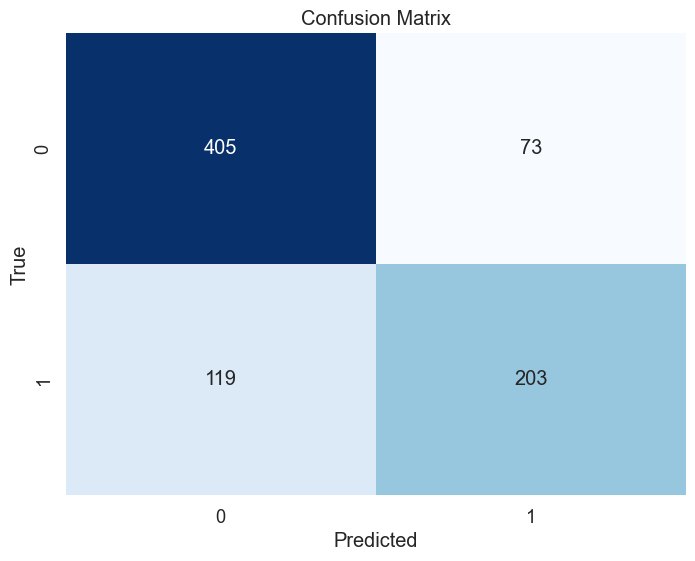

In [30]:
evaluate_model_with_graph(clf, X_test, y_test, classes=['0', '1'])